Cannabis is a kind of  plant for medical or recreational use. it  can be used by extact products, smoking, vaporizing, food, and so on.



Our goal is to describe the established data source with at least rough data able to be provided on day one. And all research will be done at Friday 29 May.


In [1]:
import pandas as pd
import numpy as np
#df= pd.read_csv("/kaggle/input/cannabis-strains/cannabis.csv")

In [2]:

df = pd.read_csv("cannabis.csv")
print(df.shape)
df.head()

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [ ]:
df.columns.to_list()

['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description', 'rating_best']

In [ ]:
df.describe()


,Rating
count,2351.000000
mean,4.310634
std,0.836394
min,0.000000
25%,4.200000
50%,4.400000
75%,4.700000
max,5.000000


In [ ]:
df['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [35]:
len(df['Strain'].unique())

2010

In [ ]:
df['Type'].value_counts(ascending=False)

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [ ]:
df['Rating'].unique()

array([4. , 4.7, 4.4, 4.2, 4.6, 0. , 4.5, 4.3, 5. , 3.8, 4.1, 4.8, 3.4,
       3.7, 3.9, 3. , 4.9, 3.6, 2.8, 3.3, 3.5, 3.2, 2. , 1. , 3.1, 2.5])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



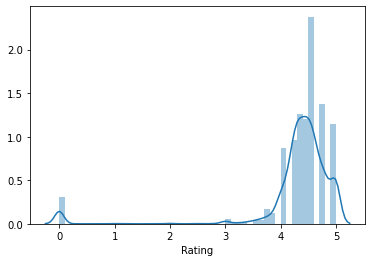

In [ ]:
import seaborn as sns
y= df['Rating']
sns.distplot(y);

In [ ]:
# Most columns are objective.
df.select_dtypes(exclude="number").columns.tolist()

['Strain', 'Type', 'Effects', 'Flavor', 'Description']

In [ ]:
df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [36]:
df.drop_duplicates(subset ='Strain', keep=False,inplace=True)
df = df[df['Description'].notnull()]
df = df[df['Flavor'].notnull()]
df.reset_index(inplace = True)
df.shape

(2010, 12)

In [ ]:
#df = df.dropna(how='all')

In [ ]:
#df["Flavor"] = df["Flavor"].fillna("None")


In [4]:
#To gather total flavors.

total_flavor = []
max_len = 0
total_flavor.append("None")
for val in df["Flavor"].values:
    print(val)
    val = val.split(",")
    
    if len(val) > max_len:
        max_len = len(val)
    
    for f in val:
        if f not in total_flavor:
            total_flavor.append(f)

Flowery,Violet,Diesel
Spicy/Herbal,Sage,Woody
Apricot,Citrus,Grapefruit
Citrus,Earthy,Orange
Earthy,Sweet,Pungent
Citrus,Pungent,Earthy
Earthy,Woody,Flowery
Earthy,Grape,Sweet
Pine,Diesel
Earthy,Pine,Skunk
Earthy,Woody,Pine
Earthy,Woody,Pungent
Citrus,Earthy,Pine
Earthy,Diesel,Flowery
None
Earthy,Sweet,Berry
Earthy,Pungent,Berry
Diesel,Pepper,Earthy
Earthy,Woody,Citrus
Earthy,Pine,Woody
Earthy,Pungent,Woody
Menthol,Blue,Cheese,Chemical
Earthy,Pine,Diesel
Earthy,Sweet,Pungent
Earthy,Diesel,Spicy/Herbal
Earthy,Sweet,Woody
Earthy,Mango,Lemon
Lemon,Diesel,Earthy
None
Sweet,Vanilla
Nutty,Earthy,Chestnut
Earthy,Flowery,Tea
Earthy,Flowery,Woody
Skunk,Woody,Sweet
Earthy,Diesel,Pungent
Flowery,Diesel,Sweet
Earthy,Sweet,Pine
Lemon,Citrus,Sweet
Flowery,Chemical,Spicy/Herbal
Sweet,Flowery,Skunk
Citrus,Skunk
Earthy,Sweet,Woody
Sweet,Pine,Woody
Woody,Pine,Pungent
Pine,Spicy/Herbal,Earthy
Pungent,Citrus,Tropical
Earthy,Pine,Pungent
Citrus,Orange,Earthy
Skunk,Citrus,Orange
Diesel,Pine,Spicy/Herbal
Ear

In [ ]:
len(total_flavor)

50

Summary 1 of our data: 

The dataset is 2351 x 6. Null values: 'Flavor' has 46 null values; 'Description' has   33 null values. 

Names of columns are : 'Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'.Most columns are objective.

'Rating' is numeric only. Most rating is 5 or 4, means most with good rating score.

Total types of weeds is 3: 'hybrid', 'sativa', 'indica'. Record of the types: hybrid :1212; indica: 699; sativa: 440.

Total number of flavor is 50. Top 10 flavor are "Butter,Sweet,Earthy;
Skunk,Sweet,Earthy;
Tropical,Earthy,Sweet;
Earthy,Pungent,Woody;
Earthy,Woody,Pungent;
Earthy,Sweet,Tropical;
Earthy,Citrus,Woody;
Earthy,Skunk,Pungent;
Sweet,Earthy;
Citrus,Pine,Earthy"






In [9]:
#!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=b2945f4814403e2ec2503fc657eae0b833cee5f76be085e901f564612c7f597b
  Stored in directory: /tmp/pip-ephem-wheel-cache-cl8nx5b4/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [5]:
## Save new dataframe to a pickle
df.to_pickle("dummy.pkl")

In [6]:
# using model to tokenize some columns.

# Base
from collections import Counter
import re

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [7]:
# remove noise and build function to tokenize. To chunk the data into  “tokens” forfurther to analyze them.

import re
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', ',', text)
    tokens = tokens.lower().replace(',', ' ')
    tokens = tokens.split()
    
    return tokens

In [38]:
# How can we count the raw text?
df['Effects'].value_counts(normalize=True)[:15]

Relaxed,Sleepy,Happy,Euphoric,Uplifted       0.009950
Relaxed,Sleepy,Happy,Euphoric,Hungry         0.008955
Relaxed,Happy,Euphoric,Uplifted,Sleepy       0.007463
Relaxed,Happy,Sleepy,Euphoric,Hungry         0.007463
None                                         0.006965
Relaxed,Happy,Euphoric,Uplifted,Creative     0.006468
Relaxed,Happy,Euphoric,Sleepy,Uplifted       0.005970
Relaxed,Sleepy,Euphoric,Happy,Hungry         0.005473
Happy,Relaxed,Uplifted,Euphoric,Creative     0.005473
Relaxed,Happy,Euphoric,Uplifted,Hungry       0.005473
Relaxed,Happy,Uplifted,Euphoric,Sleepy       0.004975
Relaxed,Happy,Sleepy,Euphoric,Uplifted       0.004975
Relaxed,Euphoric,Sleepy,Happy,Hungry         0.003980
Happy,Uplifted,Relaxed,Euphoric,Energetic    0.003483
Relaxed,Happy,Euphoric,Uplifted,Giggly       0.003483
Name: Effects, dtype: float64

In [8]:
#Chunking effects into tokens:
df['Effects_tokens'] = df['Effects'].apply(tokenize)
df['Effects_tokens'].head()


0     [relaxed, aroused, creative, happy, energetic]
1    [uplifted, happy, relaxed, energetic, creative]
2      [tingly, creative, hungry, relaxed, uplifted]
3    [happy, relaxed, euphoric, uplifted, talkative]
4       [relaxed, euphoric, happy, uplifted, hungry]
Name: Effects_tokens, dtype: object

In [12]:
# chunking flavor into tokens for further analysis.

df['Flavor_tokens'] = df['Flavor'].apply(tokenize)
df['Flavor_tokens'].head()

0        [flowery, violet, diesel]
1     [spicy, herbal, sage, woody]
2    [apricot, citrus, grapefruit]
3         [citrus, earthy, orange]
4         [earthy, sweet, pungent]
Name: Flavor_tokens, dtype: object

In [9]:

from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(list(temp), columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc

In [10]:
wc_effects = count(df['Effects_tokens'])
print(wc_effects.shape)
wc_effects.sort_values(by='rank')

(14, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,happy,1697,1697,1.0,0.171535,0.171535,0.844279
4,relaxed,1569,1569,2.0,0.158597,0.330132,0.780597
9,euphoric,1472,1472,3.0,0.148792,0.478924,0.732338
5,uplifted,1345,1345,4.0,0.135955,0.614879,0.669154
3,creative,652,652,5.0,0.065905,0.680784,0.324378
12,sleepy,644,644,6.0,0.065097,0.745881,0.320398
2,energetic,566,566,7.0,0.057212,0.803093,0.281592
11,focused,532,532,8.0,0.053775,0.856868,0.264677
6,hungry,405,405,9.0,0.040938,0.897807,0.201493
8,talkative,303,303,10.0,0.030628,0.928434,0.150746


In [13]:
wc_flavor = count(df['Flavor_tokens'])
print(wc_flavor.shape)
wc_flavor.sort_values(by='rank')

(51, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,earthy,996,996,1.0,0.162586,0.162586,0.495522
13,sweet,969,969,2.0,0.158178,0.320764,0.482090
7,citrus,473,473,3.0,0.077212,0.397976,0.235323
12,pungent,410,410,4.0,0.066928,0.464904,0.203980
18,berry,336,336,5.0,0.054848,0.519752,0.167164
15,pine,276,276,6.0,0.045054,0.564806,0.137313
2,flowery,241,241,7.0,0.039341,0.604146,0.119900
5,woody,228,228,8.0,0.037218,0.641365,0.113433
0,diesel,220,220,9.0,0.035913,0.677277,0.109453
4,spicy,205,205,10.0,0.033464,0.710741,0.101990


In [14]:
print(len(wc_effects['word'].to_list()))

14


In [15]:

wc_effects = wc_effects.sort_values(by='rank')
wc_effects['word'].to_list()

['happy',
 'relaxed',
 'euphoric',
 'uplifted',
 'creative',
 'sleepy',
 'energetic',
 'focused',
 'hungry',
 'talkative',
 'tingly',
 'giggly',
 'aroused',
 'none']

In [16]:
print(len(wc_flavor['word'].to_list()))

51


In [17]:
wc_flavor = wc_flavor.sort_values(by='rank')
wc_flavor['word'].to_list()[:26]

['earthy',
 'sweet',
 'citrus',
 'pungent',
 'berry',
 'pine',
 'flowery',
 'woody',
 'diesel',
 'spicy',
 'herbal',
 'lemon',
 'skunk',
 'tropical',
 'blueberry',
 'grape',
 'orange',
 'cheese',
 'pepper',
 'lime',
 'strawberry',
 'grapefruit',
 'sage',
 'minty',
 'pineapple',
 'none']

In [18]:
df['Description'] = df['Description'].str.replace(u'\xa0', u' ')
df['Description'].head()

0    The ‘98 Aloha White Widow is an especially pot...
1    1024 is a sativa-dominant hybrid bred in Spain...
2    13 Dawgs is a hybrid of G13 and Chemdawg genet...
3    Also known as Kosher Tangie, 24k Gold is a 60%...
4    The 3 Kings marijuana strain, a holy trinity o...
Name: Description, dtype: object

In [19]:
# Tokenizer Pipe
from spacy.tokenizer import Tokenizer

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

tokens = []
STOP_WORDS = nlp.Defaults.stop_words.union([' '])

""" Make them tokens """
for doc in tokenizer.pipe(df['Description'], batch_size=500):
    doc_tokens = []   
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower()) 
    tokens.append(doc_tokens)

df['Description_tokens'] = tokens

In [20]:
df['General_Description'] = df['Effects']+""+df['Flavor']+""+df['Description']

In [21]:
df['General_Description'][0]

'Relaxed,Aroused,Creative,Happy,EnergeticFlowery,Violet,DieselThe ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes, giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank.  '

### Pickle saves the serialized files and the  model on disk and then deserialize back when we  want to classify new samples without needing to learn the model from the training data.  To save the pickled file by code:  pd.to_pickle('sub.pkl') and to open by: pd.read_pickle('sub.pkl').

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['General_Description'])

# Save tfidf to a pickle
pickle.dump(tfidf, open("tfidf.pkl", "wb"))

# Get feature names to use as dataframe column headers
general_dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
general_dtm.head()

,09,10,100,11,12,13,14,15,16,17,...,zen,zest,zestful,zesty,zeta,zion,zkittlez,zombie,zone,zoning
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.307004,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import NearestNeighbors
# Fit on dtm

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(general_dtm)

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(nn) 
  
# Load the pickled model 
nn_model = pickle.loads(saved_model) 
  
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(nn_model, 'nn_model.pkl') 
  
# Load the model from the file 
nn_model = joblib.load('nn_model.pkl')  

In [25]:
my_desc = [""" 
none,
pineapple,  peach, 
Depression
"""]

new = tfidf.transform(my_desc)
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [26]:
_, similar_topic_indices = nn.kneighbors(new.todense())

In [30]:
similar_topic_indices

array([[ 768, 1369, 1267, 1375, 1371]], dtype=int64)

Provides 5 strains based on the input.

In [32]:
#columns = ['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description']

strains = [df['Strain'][t] for t in similar_topic_indices]
print('- - - - Strains - - - - ')
print(strains, sep='\n\n')
print(end="\n\n")

types = [df['Type'][t] for t in similar_topic_indices]
print('- - -  Types - - - ')
print(types, sep='\n\n')
print(end="\n\n")

ratings = [df['Rating'][t] for t in similar_topic_indices]
print('- - - Ratings - - -')
print(ratings, sep='\n\n')
print(end="\n\n")

similar_flavors = [df['Flavor'][t] for t in similar_topic_indices]
print('- - - Flavors - - -')
print(similar_flavors, sep='\n\n')
print(end="\n\n")

similar_effects = [df['Effects'][t] for t in similar_topic_indices]
print('- - -  Effects - - - ')
print(similar_effects, sep='\n\n')
print(end="\n\n")

similar_topics = [df['Description'][t] for t in similar_topic_indices]
print('- - -  Descriptions - - - ')
print(similar_topics, sep='\n\n')

- - - - Strains - - - - 
[768                Golden-Pineapple
1369                   Pineapple-Og
1267            Northwest-Pineapple
1375    Pineapple-Super-Silver-Haze
1371         Pineapple-Purple-Skunk
Name: Strain, dtype: object]


- - -  Types - - - 
[768     hybrid
1369    sativa
1267    hybrid
1375    sativa
1371    hybrid
Name: Type, dtype: object]


- - - Ratings - - -
[768     4.5
1369    4.6
1267    5.0
1375    4.7
1371    4.5
Name: Rating, dtype: float64]


- - - Flavors - - -
[768     Pineapple,Tropical,Citrus
1369    Pineapple,Citrus,Tropical
1267              Sweet,Pineapple
1375       Pineapple,Sweet,Earthy
1371       Sweet,Citrus,Pineapple
Name: Flavor, dtype: object]


- - -  Effects - - - 
[768      Happy,Euphoric,Uplifted,Relaxed,Creative
1369    Happy,Uplifted,Focused,Creative,Energetic
1267              Uplifted,Euphoric,Happy,Relaxed
1375      Happy,Euphoric,Energetic,Focused,Tingly
1371      Relaxed,Happy,Uplifted,Euphoric,Aroused
Name: Effects, dtype: object]


In [31]:
df.head()

,index,Strain,Type,Rating,Effects,Flavor,Description,Effects_tokens,Flavor_tokens,Description_tokens,General_Description
0,1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"[relaxed, aroused, creative, happy, energetic]","[flowery, violet, diesel]","[‘98, aloha, white, widow, especially, potent,...","Relaxed,Aroused,Creative,Happy,EnergeticFlower..."
1,2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"[uplifted, happy, relaxed, energetic, creative]","[spicy, herbal, sage, woody]","[1024, sativa-dominant, hybrid, bred, spain, m...","Uplifted,Happy,Relaxed,Energetic,CreativeSpicy..."
2,3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[tingly, creative, hungry, relaxed, uplifted]","[apricot, citrus, grapefruit]","[13, dawgs, hybrid, g13, chemdawg, genetics, b...","Tingly,Creative,Hungry,Relaxed,UpliftedApricot..."
3,4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","[happy, relaxed, euphoric, uplifted, talkative]","[citrus, earthy, orange]","[known, kosher, tangie,, 24k, gold, 60%, indic...","Happy,Relaxed,Euphoric,Uplifted,TalkativeCitru..."
4,6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o...","[relaxed, euphoric, happy, uplifted, hungry]","[earthy, sweet, pungent]","[3, kings, marijuana, strain,, holy, trinity, ...","Relaxed,Euphoric,Happy,Uplifted,HungryEarthy,S..."
